<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Clase 2b: Ejemplo de Teoría de Campos

_Después de estudiar la sintaxis de Python, empezar a manejar datos numéricos de manera un más eficiente y ver las funcionalidades básicas de matplotlib, ha llegado el momento de abordar un problema más complejo. En esta clase utilizaremos  **matplotlib** y **NumPy** para programar algunos ejemplos de tomados de un problea de Teoría de Campos._

Nos basaremos en algunos de los ejemplos de https://mat.caminos.upm.es/wiki/Categor%C3%ADa:Teor%C3%ADa_de_Campos

## 0. Dibujando una circunferencia

En primer lugar activamos el modo inline:

In [1]:
%matplotlib inline

e importamos los paquetes necesarios:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Como paso previo a la creación de un anillo circular crearemos una circunferencia, ya que es un ejemplo más sencillo

1. __Creamos `N` puntos de la circunferencia__ de modo que __en `Xc` estén las coordenadas $x$ y en `Yc` estén las coordenadas $y$__ de los puntos que la forman. Controla el número de puntos mediante un parámetro que se llame `N_puntos`.

    $$X_c = x0 + R·cos(\theta)$$
    $$Y_c = y0 + R·sin(\theta)$$

2. Una vez hayas obtenido los dos arrays `Xc` e `Yc`, __píntalos mediante un `scatter`__ para comprobar que todo ha ido bien.
3. Pinta también el __centro de la circunferencia__.

El resultado debería ser parecido a esto:

![circunferencia](../static/circunferencia.png)

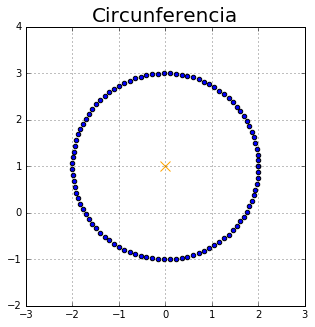

In [3]:
# Número de puntos de la circunferencia
N_puntos = 100

# Centro
x0 = 0
y0 = 1

#Radio
R = 2 

# Se barre un ángulo de 0 a 2 pi
theta = np.linspace(0, 2*np.pi, N_puntos)

# Se crean las coordenadas del los puntos
# de la circunferencia
Xc = x0 + R * np.cos(theta)
Yc = y0 + R * np.sin(theta)

# Lo representamos
plt.figure("circunferencia", figsize=(5,5))
plt.title('Circunferencia', {'fontsize':20})
plt.scatter(Xc, Yc)
plt.scatter(x0, y0, color='orange', marker='x', s=100)
plt.grid()

Visto este ejemplo, estamos en condiciones de crear una malla para nuestra placa en forma de anillo.

## Placa plana bidimensional con forma de anillo.

### Mallado del problema.

En primer lugar necesitamos crear una malla que represente nuestra placa.

In [4]:
# Dirección radial:
Nr = 20  # Número de puntos en la dirección radial.
R_min = 1  # m.
R_max = 5  # m.

# Dirección tangencial:
Nt = 180   # Número de puntos en la dirección tangencial.

r = np.linspace(R_min, R_max, Nr)
t = np.linspace(0, 2*np.pi , Nt)

# Crear la malla:
xx =  r * np.cos(t).reshape([-1, 1])
yy = r * np.sin(t).reshape([-1, 1])

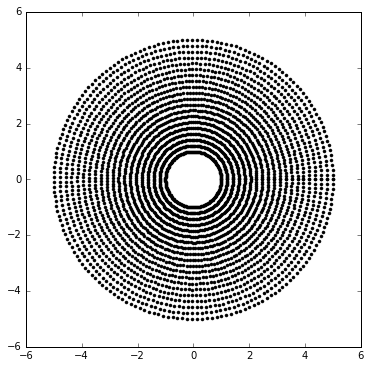

In [5]:
#pintamos la malla para verla
plt.figure(figsize=(6, 6))
plt.plot(xx.flatten(), yy.flatten(), 'k.')

### Distribución de temperaturas

Imaginemos que nuestra placa se somete a una distribución de temperaturas según la función:

$$T = -  \log(\sqrt{x^2 + y^2}) $$

Define una función que dados unos valores de x e y, devuelva el valor de la temperatura en el punto.

In [6]:
def temperature_distribution(x, y):
    """Calculate the temperature for a point defined by
    its cartesian coordinates: x, y.
    """
    return -np.log(np.sqrt(x**2 + y**2))

Calcula los valores de temperatura en cada punto de la malla:

In [7]:
temps = temperature_distribution(xx, yy)

Ahora los representaremos usando un `contourf`.

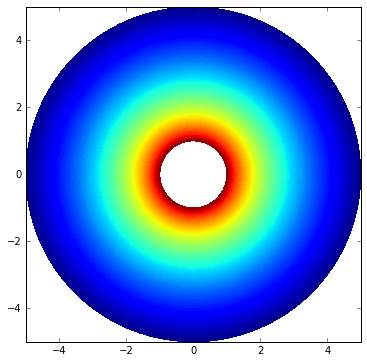

In [8]:
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, temps, 100)

Además, puede que nos interese añadir una líneas de nivel sobre el gráfico anterior.

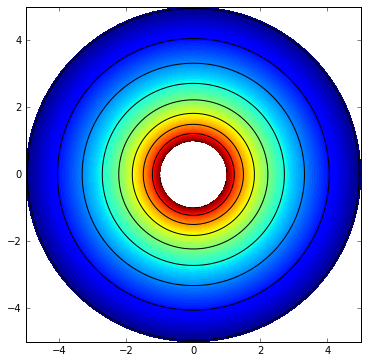

In [9]:
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, temps, 100)
plt.contour(xx, yy, temps, 10, colors='black', linestyles='-')

Además completaremos nuestra gráfica con una barra en la que se indique el nivel asignado a cada color.

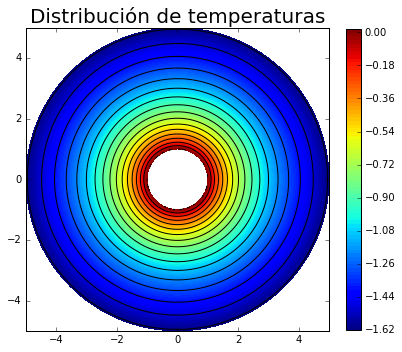

In [10]:
plt.figure(figsize=(6, 6))
plt.title('Distribución de temperaturas', fontsize=20)
plt.contour(xx, yy, temps, 20, colors='black', linestyles='-')
plt.contourf(xx, yy, temps, 100)
plt.colorbar(fraction=0.045)
plt.gca().set_aspect(1)

Podía resultar interesante, cambiar de mapa de colores. ¡Echemos un vistazo a los que tenemos disponibles!

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos (http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#colormaps)

![matplotlib colormaps](../static/plot_colormaps.png)

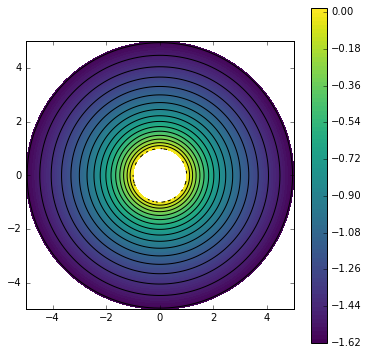

In [11]:
my_cmap = plt.cm.viridis
plt.figure(figsize=(6, 6))
plt.contour(xx, yy, temps, 20, colors='black', linestyles='-')
plt.contourf(xx, yy, temps, 100, cmap=my_cmap)
plt.colorbar()
plt.gca().set_aspect(1)

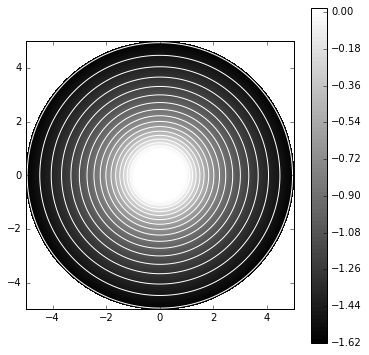

In [12]:
my_cmap = plt.cm.gray
plt.figure(figsize=(6, 6))
plt.contour(xx, yy, temps, 20, colors='white', linestyles='-')
plt.contourf(xx, yy, temps, 100, cmap=my_cmap)
plt.colorbar()
plt.gca().set_aspect(1)

Como más adelante calcularemos el gradiente, quizá sea útil representar la temperatura en la placa como una superficie:

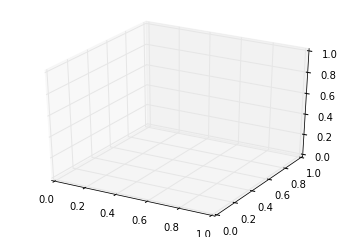

In [13]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure('Surface')
plt.subplot(111, projection='3d')

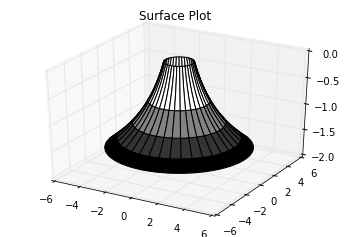

In [14]:
plt.figure('Surface')
ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, temps, rstride=5, cstride=5, cmap=my_cmap)
plt.title('Surface Plot')

Más ejemplos de gráficas en 3d en http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

### Gradiente de la distribución de temperaturas.

En primer lugar definiremos una función que calcule el gradiente en cualquier punto x, y:

In [15]:
def temp_gradient(x, y):
    """Calculate the temperature gradient for a point
    defined by its cartesian coordinates: x, y.
    """    
    fx = -x / (x**2 + y**2)
    fy = -y /  (x**2 + y**2)
    return fx, fy    

Veremos en una de las clases siguiente, cómo podríamos calcular simbólicamente la derivada de una expresión, de manera que esta función se genere de manera automática para nostoros.

Carguemos los valores de las componenetes del gradiente $(f_x, f_y)$:

In [16]:
fx, fy = temp_gradient(xx, yy)

Utilizaremos ahora la función `quiver` de matplotlib para representar los vectores del gradiente de la función

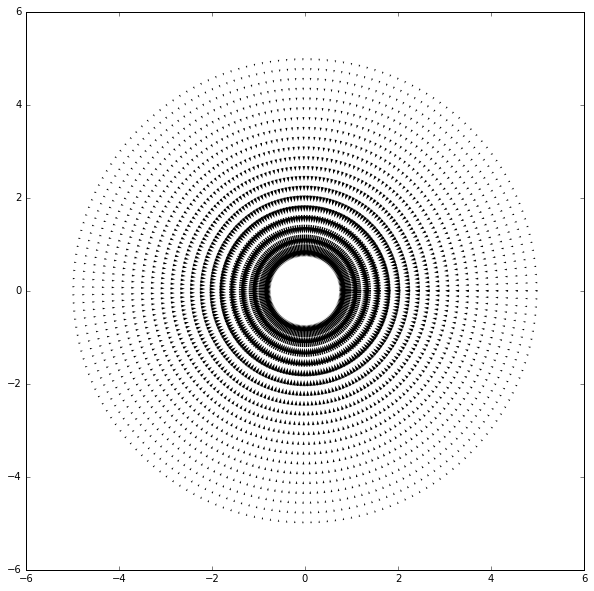

In [17]:
plt.figure(figsize=(10, 10))
plt.quiver(xx, yy, fx, fy)

No está mal para ser el primer intento... Pero ¡podemos mejorar! Pintaremos los vectores más grandes usando el argumento `scale`.

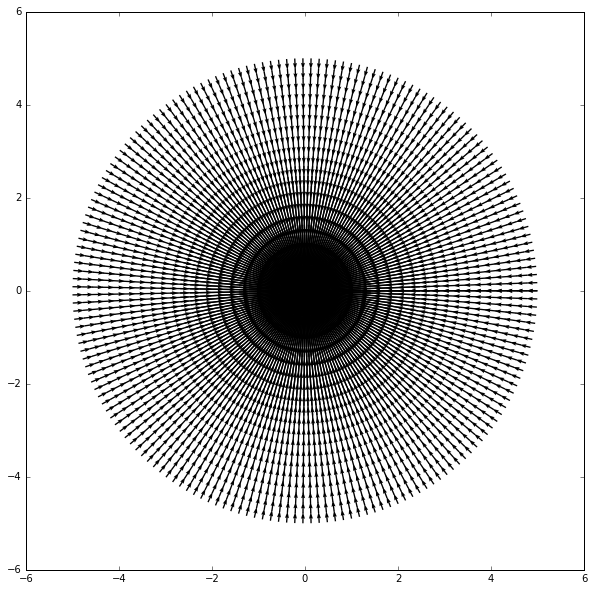

In [18]:
plt.figure(figsize=(10, 10))
plt.quiver(xx, yy, fx, fy, scale=10)

Podemos ver que el módulo del gradiente varía mucho del interior al exterior (como podíamos esperar). Una opción para reprentarlo de forma más cómoda sería, hacer todos los vectores de módulo unitario y representar la norma del gradiente con un colormap.

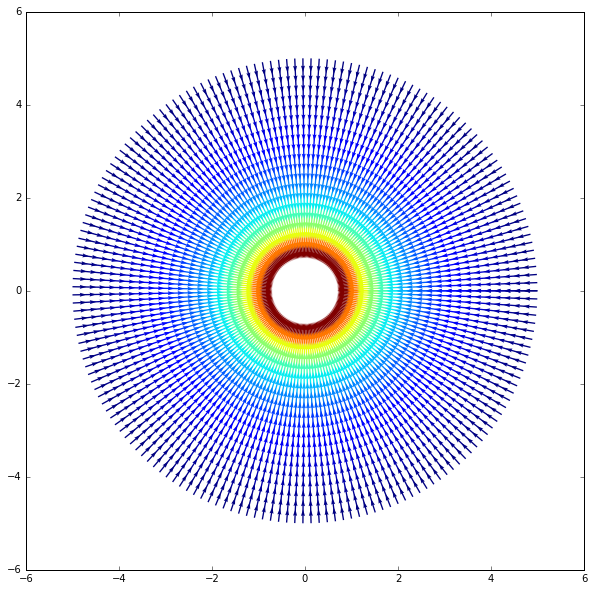

In [19]:
norm = np.sqrt(fx**2 + fy**2)
fx_norm = fx / norm
fy_norm = fy / norm
plt.figure(figsize=(10, 10))
plt.quiver(xx, yy, fx_norm, fy_norm, norm, scale=40)

Y quizá otra idea útil sería pintar menos flechas. Para eso podemos reducir el número de puntos indexando los arrays, por ejemplo saltando los elementos impares.

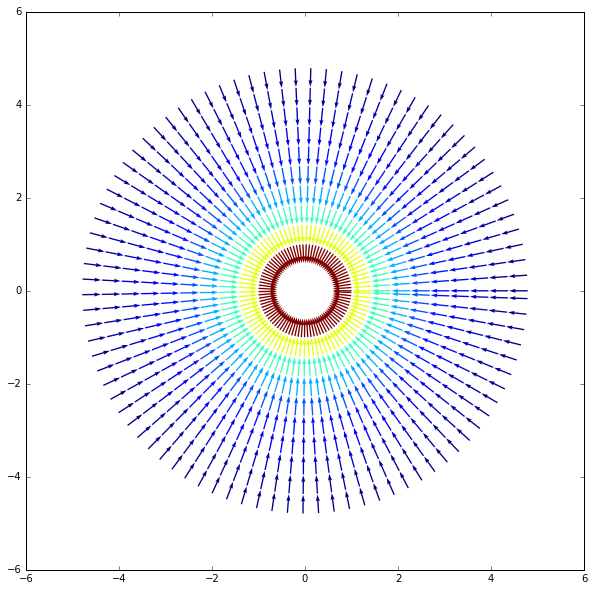

In [20]:
plt.figure(figsize=(10, 10))
plt.quiver(xx[::2,::2], yy[::2,::2], fx_norm[::2,::2], fy_norm[::2,::2], norm[::2,::2], scale=30)

### Campo de desplazamientos

Aplicaremos ahora un campo de desplazamientos de la forma:

$$  \vec u(\rho,\theta)=\frac{\sin(\pi \theta/2)}{30\rho}\vec g_{\rho} $$

que podemos represntaremos así:

In [21]:
def desplazamientos(x, y):
    
    u = np.sqrt(x**2 + y**2)
    v = np.arctan2(y, x)
    
    ux = np.sin(np.pi * v / 2) / (30 * u) * np.cos(v)  # componente x de los desplazamientos
    uy = np.sin(np.pi * v / 2) / (30 * u) * np.sin(v)    # componente y de los desplazamientos
    
    return ux, uy

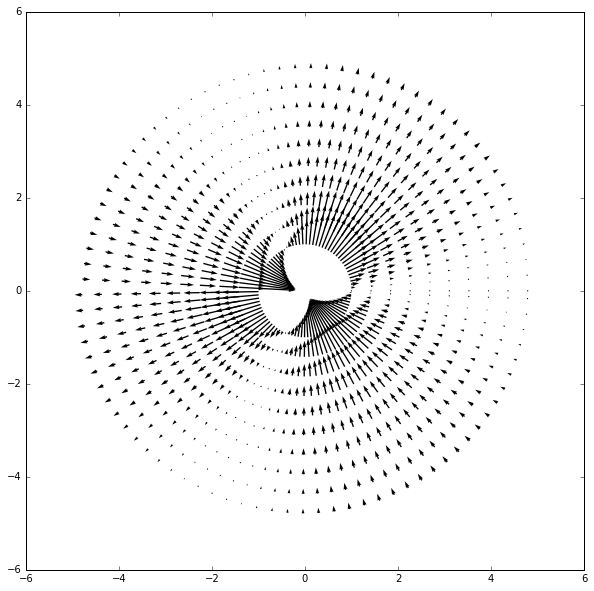

In [22]:
ux, uy = desplazamientos(xx, yy)

plt.figure(figsize=(10, 10))
plt.quiver(xx[::2,::2], yy[::2,::2], ux[::2,::2], uy[::2,::2], scale=0.5)

Podemos pintar el sólido antes y después del desplazamiento:

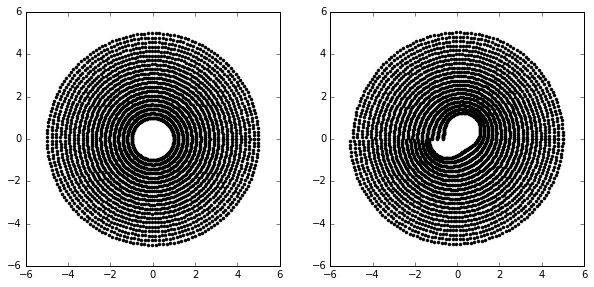

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.plot(xx.flatten(), yy.flatten(), 'k.')
plt.gca().set_aspect(1)

plt.subplot(122)
plt.plot(xx.flatten() + 10 * ux.flatten(),
            yy.flatten() + 10 * uy.flatten(), 'k.')
plt.gca().set_aspect(1)

### Tensiones normales en la dirección $\vec g_\rho$.

La expresión que proporciona las tensiones, conocidas las deformaciones es:

$$ \sigma_{ij}=\lambda \nabla \cdot \vec u \delta_{ij} + 2\mu \epsilon_{ij} $$

Donde $\lambda$ y $\mu$ son conocidos como los coeficientes de Lamé que dependen de las propiedades elásticas de cada material y $\epsilon_{ij}$ es la parte simétrica del tensor gradiente del campo vectorial $\vec u$.

Tomando $\lambda =1$ y $\mu =1$, el tensor de deformaciones en forma matricial resulta:
$$\sigma_{ij}= \begin{bmatrix} \frac{-\sin(\pi \theta/2)}{15\rho^2} & \frac{\pi\cdot\cos(\pi \theta/2)}{60\rho} & 0 \\ \frac{\pi\cdot\cos(\pi \theta/2)}{60\rho} & \frac{\sin(\pi \theta/2)}{15\rho^2} & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

Que da lugar a una tensiones normales en la dirección radial:

$$ \vec g_{\rho} \cdot \sigma \cdot \vec g_\rho\ $$

In [24]:
def tensiones_normales(x, y):
    u = np.sqrt(x**2 + y**2)
    v = np.arctan2(y, x)
    
    tens = - np.sin(np.pi * v / 2) / (15 * u**2)
    
    return tens

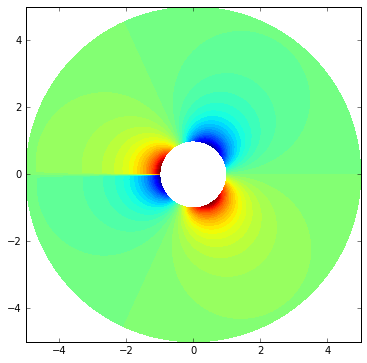

In [25]:
ff = tensiones_normales(xx, yy)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, ff, 50)

<div class="alert alert-info">¿Cómo se ajusta el espacio entre gráficas para que no se solapen los textos? Buscamos en Google "plt.subplot adjust" en el primer resultado tenemos la respuesta http://stackoverflow.com/a/9827848</div>

## Referencias

* Trabajos de https://mat.caminos.upm.es/wiki/Categor%C3%ADa:Teor%C3%ADa_de_Campos

---

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso-AeroPython-UC3M/" data-text="Aprendiendo Python con" data-via="AeroPython" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [26]:
%%html
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [27]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())